# Session 1 Exercises

## Part 1: Spike Counts

Imagine you've just finished recording from a V1 neuron. Across 60 trials, you presented either a vertical or horizontal Gabor patch (30 each) and recorded the corresponding number of spikes (counts below). Now you want to ask some questions of your data.

In [1]:
## Spike counts: vertical Gabor patch.
spikes_v = [39, 36, 38, 32, 28, 33, 28, 29, 30, 31, 22, 37, 26, 22, 37, 
            34, 26, 30, 32, 34, 30, 26, 30, 26, 32, 30, 28, 21, 35, 41]

## Spike counts: horizontal Gabor patch.
spikes_h = [28, 19, 15, 19, 25, 27, 19, 19, 28, 18, 19, 24, 14, 24, 16, 
            11, 24, 16, 21, 22, 18, 24, 24, 20, 15, 26, 20, 17, 21, 26]

#### Exercise 1: Indexing

a) Return the spike count corresponding to the 17th presentation of the vertical stimulus.

In [2]:
spikes_v[18]

32

b) Return the spike count corresponding to the fifth-from-last presentation of the horizontal stimulus.

In [3]:
spikes_h[-5]

26

c) Return the spike counts from every fourth presentation of the horizontal stimulus. 

In [4]:
spikes_h[::4]

[28, 25, 28, 14, 24, 18, 15, 21]

d) Return spike count corresponding to the 3rd, 8th, and 10th-from-last presentaiton of the vertical stimulus. (Hint: use list comprehensions.)

In [5]:
[spikes_v[i] for i in [4, 9, -10]]

[28, 31, 30]

e) Return the 2nd largest recorded spike count in response to the vertical stimulus. (Hint: use the `sort` function.)

In [6]:
sorted(spikes_v)[-2]

39

#### Exercise 2: Built-in Functions

a) Compute and store in separate variables the max spike count from each stimulus condition. Then, using an `if/else` statement, write some code which prints out which condition had the larger max count.

In [7]:
max_v = max(spikes_v)    # Max spike (vertical)
max_h = max(spikes_h)    # Max spike (horizontal)

if max_v > max_h:
    print('V > H')
else:
    print('V < H')

V > H


b) Compute and store in separate variables the total spike counts from each stimulus condition. Then, using an `if/else` statement, write some code which prints out which condition had the smaller total count.

In [8]:
sum_v = sum(spikes_v)    # Total spikes (vertical)
sum_h = sum(spikes_h)    # Total spikes (horizontal)

if sum_v > sum_h:
    print('V > H')
else:
    print('V < H')

V > H


#### Exercise 3: Basic Scripting
a) Using list comprehensions, create a new copy of each list that now contains spikes counts greater than or equal to 25. How many counts are now in each list?

In [9]:
big_bois_v = [c for c in spikes_v if c >= 25]
big_bois_h = [c for c in spikes_h if c >= 25]

print(f'Vertical: {len(big_bois_v)}')
print(f'Horizontal: {len(big_bois_h)}')

Vertical: 27
Horizontal: 6


b) Using a for loop, create new list containing only the intersection of the two lists (i.e. containing only spike counts present in both lists).

In [10]:
## Initalize new list.
intersection = []

## Iterate over both lists.
for v, h in zip(spikes_v, spikes_h):
    
    ## Check if v-spike in horizontal.
    if v in spikes_h and v not in intersection: 
        intersection.append(v)
        
    ## Check if h-spike in horizontal.
    if h in spikes_v and h not in intersection: 
        intersection.append(h)
        
## Sort for good measure.
intersection = sorted(intersection)
    
print(intersection)

[21, 22, 26, 28]


c) Do the same as above, now only using list comprehensions.

In [11]:
## Find v in horizontal.
h_in_v = [h for h in spikes_h if h in spikes_v]
v_in_h = [v for v in spikes_v if v in spikes_h]

## Use sets to find intersection.
intersection = list(set(h_in_v + v_in_h))

## Sort for good measure.
intersection = sorted(intersection)
    
print(intersection)

[21, 22, 26, 28]


#### Exercise 4: Custom Functions
a) Copy the **mean** function from today's lecture. Which condition shows the greater number of spikes on average? 

In [12]:
def mean(X):
    "Compute arithmetic average."
    return sum(X) / len(X)

print('Mean(vertical)   = %0.3f' %mean(spikes_v))
print('Mean(horizontal) = %0.3f' %mean(spikes_h))

Mean(vertical)   = 30.767
Mean(horizontal) = 20.633


b) Write a function that computes the **median** of a list. Which condition shows the greater median number of spikes?

In [13]:
def median(X):
    "Find median of list."
    
    ## Check if odd or even.
    odd = len(X) % 2
    
    ## If odd, return middle index.
    if odd:
        return X[len(X) // 2]
    
    ## If even, take average of middle indexes.
    else:
        lb = X[len(X) // 2 - 1]    # Lower-bound
        ub = X[len(X) // 2]        # Upper-bound
        return (lb + ub) / 2
    
print('Median(vertical)   = %0.1f' %median(spikes_v))
print('Median(horizontal) = %0.1f' %median(spikes_h))

Median(vertical)   = 35.5
Median(horizontal) = 13.5


c) Write a function that computes the **standard deviation** of a list. Which condition shows the greater standard deviation in the number of spikes? As a reminder, the formula for the standard deviation is:

$$ s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2 }$$ 

In [14]:
def mean(x):
    "Compute arithmetic average."
    return sum(x) / len(x)

def std(X):
    "Compute empirical standard deviation."
    
    ## Calculate empirical mean.
    mu = mean(X)
    
    ## Compute sum of squared error.
    sse = sum( [ (x - mu)**2 for x in X ] )
    
    ## Normalize.
    var = sse / (len(X) - 1)
    
    return var ** 0.5

print('SD(vertical)   = %0.3f' %std(spikes_v))
print('SD(horizontal) = %0.3f' %std(spikes_h))

SD(vertical)   = 5.077
SD(horizontal) = 4.429


## Part 2: Challenges

Below are some programming challenges to test out your python muster!

#### Exercise 1

Write a function that checks if the inputted argument is even, odd, a float, or not a number (NaN).

In [15]:
def number_checker(x):
    """A silly number checker."""
    
    if isinstance(x, int) and x % 2: 
        print(f'{x} is odd.')
    elif isinstance(x, int):
        print(f'{x} is even.')
    elif isinstance(x, float):
        print(f'{x} is a float.')
    else:
        print(f'"{x}" is not a number.')
        
number_checker(1)
number_checker(2)
number_checker(2.5)
number_checker("yay")

1 is odd.
2 is even.
2.5 is a float.
"yay" is not a number.


#### Exercise 2
Starting with the list below, construct a `while` loop that returns the [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number) and terminates only when the most recent number is greater than 5000.

In [16]:
## Initialize list.
vals = [0,1]

while vals[-1] <= 5000:
    
    ## Iteratively append sum of two most recent entries.
    vals.append( vals[-2] + vals[-1] )
    
print(vals)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


#### Exercise 3
Define a function that checks if an inputted integer is prime. Test your function on the following numbers: 
>1411, 1147, 2327, 2683, 33233

Only one number above is not prime. 

As an added challenge, if the tested integer is not prime, have the function return a number the integer is divisible by.

##### Version 1

In [17]:
def is_prime(i):
    """Check if integer is prime."""
    
    ## Error-catching.
    assert isinstance(i, int)
    
    ## Define range of divisors. 
    divisors = range(2,i)
    
    ## Iterately compute remainders from division.
    remainders = [True if i % d == 0 else False for d in divisors]
    
    ## Check for no remainder.
    if any(remainders):
        print('%s is divisible by %s.' %(i,divisors[remainders.index(True)]))
    else:
        print('%s is prime!' %i)

## Test function.
for i in [1411, 1147, 2327, 2683, 33233]:
    is_prime(i)

1411 is divisible by 17.
1147 is divisible by 31.
2327 is divisible by 13.
2683 is prime!
33233 is divisible by 167.


##### Version 2

In [18]:
def is_prime(i):
    """Check if integer is prime."""
    
    ## Error-catching.
    assert isinstance(i, int)
    
    ## Initialize divisor.
    d = 2
    
    ## Iteratively check for no remainder.
    while d < i:
        if i % d == 0:
            return(d)
        else:
            d += 1
    
    return(None)

## Test function.
for i in [1411, 1147, 2327, 2683, 33233]:
    print('%s is divisible by %s.' %(i,is_prime(i)))

1411 is divisible by 17.
1147 is divisible by 31.
2327 is divisible by 13.
2683 is divisible by None.
33233 is divisible by 167.


## Part 3: Basic NumPy Operations
a) Generate an array of numbers 0-24. Reshape to a 5x5 matrix.

In [19]:
import numpy as np

mat = np.arange(25).reshape(5,5)
print(mat)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


b) Extract the diagonal of this matrix.

In [20]:
diag = np.diag(mat)
print(diag)

[ 0  6 12 18 24]


c) Multiply the matrix by an identity matrix of the same shape. Confirm that it is identical to the original. (Hint: Use `np.all` command to confirm all equal.)

In [21]:
## Construct identity matrix.
identity = np.identity(5)

## Matrix multiplication.
mat2 = mat @ identity

## Confirm all equal.
print( np.all(mat == mat2) )

True


d) Return the indices of the matrix where the elements are greater than 15.

In [22]:
i,j = np.where(mat > 15)
print(i,j)

[3 3 3 3 4 4 4 4 4] [1 2 3 4 0 1 2 3 4]


e) Using `np.where`, set all elements of the matrix greater than 15 to 1, else 0.


In [23]:
## Binarize matrix (v1).
mat4 = (mat > 15).astype(int)

## Binarize matrix (v2).
mat4 = np.where(mat > 15, 1, 0)

f) Set all elements of the matrix greater than 15 to 2, less than 5 to 1, else 0. (Hint: `np.where` can be passed as an input to `np.where`.)

In [24]:
## Trinarize matrix.
mat5 = np.where(mat > 15, 2, np.where(mat > 5, 1, 0))

g) Define a demean function.

In [25]:
def demean(arr):
    """De-mean array."""
    return arr - np.mean(arr)

h) Apply the demean function across each row of the matrix.

In [26]:
## Demean each row.
mat6 = np.apply_along_axis(demean, 1, mat)
print(mat6)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


## Part 4: Example Dataset

In this exercise, you will be using NumPy to manipulate and analyze simulated recording data. 

Imagine you have recorded the response of several neurons to some input stimuli. A week later, when you have to make a figure, you cannot remember exactly what you did. Luckily for you, you have the data and a description of each variable: 

| Variable  | Description |
|:---------:|-------------------------------------------------------------------|
| spikes  | Binary matrix, (n_trials, n_samples).<br>_1_ = spike was detected.<br>_0_ = no spike was detected. |
| times   | The start time of each sample. |
| neurons | An array denoting the neuron identity for a trial. |
| stimuli | An array denoting the stimulus used for a trial. |
| sfreq   | The sampling frequency of the recording. |

Work on the exercises below. By the end, you should be able to answer some questions about this dataset.

In [27]:
## Load compressed file and extract data.
npz = np.load('spikes.npz')    
spikes = npz['spikes']               # Raw spike data.
times  = np.round(npz['times'],3)    # Recording time info.
neurons = npz['neurons']             # Neuron identifier
stimuli = npz['stimuli']             # Stimulus identifier
sfreq = float(npz['sfreq'])          # Sampling frequency

#### Exercise 1: Interrogating the Data

a) What is the shape of the raw spiking data? 

In [28]:
print('Shape =', spikes.shape)

Shape = (40, 7501)


b) How many trials are there per neuron?

In [29]:
print('Neurons =', np.unique(neurons, return_counts=True))

Neurons = (array([1, 2]), array([20, 20]))


c) How many trials are there per stimulus?

In [30]:
print('Stimulus =', np.unique(stimuli, return_counts=True))

Stimulus = (array([1, 2]), array([20, 20]))


d) How long is each trial of recording? (Hint: this dataset is stimulus-locked, meaning that 0 corresponds to the onset of the stimulus.)

In [31]:
print('Timing =', times.min(), times.max(), times.max() - times.min())

Timing = -5.0 10.0 15.0


e) How long is each sample of recording? That is, what is the time step?

In [32]:
print('Time step =', 1. / sfreq)

Time step = 0.002


#### Exercise 2: Averaging the Raw Data

To get started, you want to eyeball the data and see if there are any noticeable differences between the spiking patterns of the neurons.

a) For each unique neuron, compute the average number of spikes per time step and store the result in a new variable.

In [33]:
spikes_A = spikes[neurons==1].mean(axis=0)
spikes_B = spikes[neurons==2].mean(axis=0)

b) Using the starter code below, plot each of the raw traces. (Don't worry much about the plotting syntax. We'll talk more about visualization next week.) 

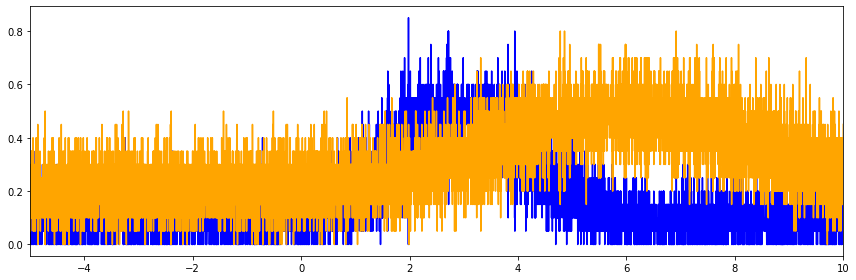

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Insert the averaged timeseries below. 
ax.plot(times, spikes_A, color='blue')
ax.plot(times, spikes_B, color='orange')
ax.set(xlim=(times.min(), times.max()))

plt.tight_layout()

c) Based on the plot above, what can you infer? Are the data messy? Does it look like there is a difference in spike counts between the neurons?

#### Exercise 3: Binning the Spike Data

To get a more reliable estimate of spiking activity, neuroscientists often bin spike count data in order to measure the number of spikes per some time bin. Over the following steps, you will compute for each trial the spike count per **100ms time bin.**

a) How many 100ms bins will fit the length of each trial? How many samples will go into each bin?

In [35]:
bin_length = 0.1 # seconds
n_bins = int((times.max() - times.min()) / 0.1)
n_samp = int(0.1 * sfreq)

print(n_bins)
print(n_samp)

150
50


b) Make a new variable, `counts`, that is an empty NumPy matrix (e.g. a matrix of zeros). The matrix should be shape (n_trials, n_bins). We will eventually store the binned spike counts in this variable.

In [36]:
counts = np.zeros((spikes.shape[0], n_bins))

c) Make a new variable, `bin_starts`, that contains the start time of each bin (i.e. -5.0, -4.9, -4.8, ..., 9.9). The final array should be shape, (n_bins).

(Hint: at least two of the array generating functions discussed earlier can do this.)

In [37]:
bin_starts = np.arange(-5, 10, 0.1)

d) Now comes the hard part. Here we will write a for loop that will iteratively count the number of spikes in each bin for all trials.

To get you started, the following is some pseudo-code for how you might solve the problem. However, feel free to ignore if you have your own solution!

- **Top-level:** `for` loop iterating over the _start_ of each time bin and its corresponding index. (Hint: which `for` loop function passes both the member of a list and its index?)
    - _Step 1:_ Find the indices of the time points in `times` which belong to the current bin. (Hint: Google `np.logical_and`.)
    - _Step 2:_ Index into _spikes_ using the indices found in Step 1. Sum within each trial.
    - _Step 3:_ Store the resulting array from Step 2 in the corresponding column of `counts`.

In [38]:
for i, tmin in enumerate(bin_starts):
    
    ## Step 1: Define indices.
    ix = np.logical_and(times >= tmin, times < tmin + 0.1)
    
    ## Step 2: Compute counts.
    sums = spikes[:,ix].sum(axis=1)
    
    ## Step 3: Store counts.
    counts[:,i] = sums

#### Exercise 4: Averaging the Count Data

a) For each unique neuron, compute the average (mean) spike count per time bin and store the result in a new variable.

In [39]:
counts_A = counts[neurons==1].mean(axis=0)
counts_B = counts[neurons==2].mean(axis=0)

b) Using the starter code below, plot each of the rate traces. 

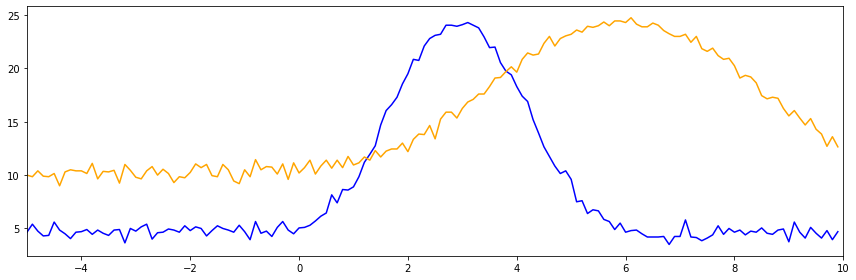

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Insert the timeseries here.
ax.plot(bin_starts, counts_A, color='blue')
ax.plot(bin_starts, counts_B, color='orange')
ax.set(xlim=(times.min(), times.max()))

plt.tight_layout()

c) Based on the plot above, what can you infer? Are the data cleaner? Does this change your interpretation from earlier?

#### Exercise 5: Lazy Data Analysis

a) If we want to know whether a neuron is more sensitive to a stimulus, or just more active overall, a good test is to measure the spike counts during some baseline period.

For each neuron, compute the average spike count in the pre-stimulus period, [-5s - 0s]. Is one neuron more active than the other overall?

In [41]:
print(counts_A[bin_starts < 0].mean())
print(counts_B[bin_starts < 0].mean())

4.777450980392157
10.247058823529414


b) Find the bin at which spike counts peak for each neuron. (Hint: Google `np.argmax`.)

In [42]:
print(bin_starts[np.argmax(counts_A)])
print(bin_starts[np.argmax(counts_B)])

3.0999999999999712
6.099999999999961


c) The recordings above actually used to two stimuli. Compute and plot the spike rate per neuron and stimulus. Copy the visualzation code above and plot. (A list of additional Matplotlib colors can be found [here](https://matplotlib.org/2.0.2/api/colors_api.html).)

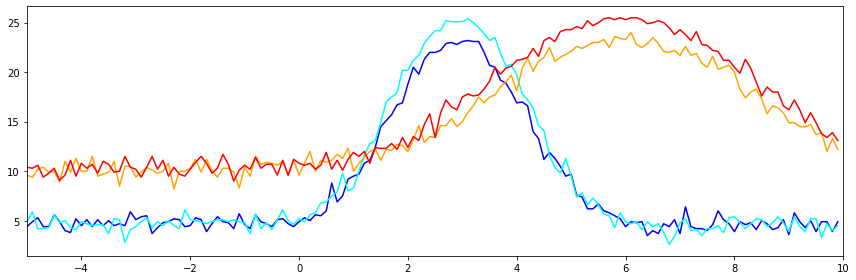

In [43]:
## Compute rates.
counts_A1 = counts[np.logical_and(neurons==1, stimuli==1)].mean(axis=0)
counts_A2 = counts[np.logical_and(neurons==1, stimuli==2)].mean(axis=0)
counts_B1 = counts[np.logical_and(neurons==2, stimuli==1)].mean(axis=0)
counts_B2 = counts[np.logical_and(neurons==2, stimuli==2)].mean(axis=0)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Insert the timeseries here.
ax.plot(bin_starts, counts_A1, color='blue')
ax.plot(bin_starts, counts_A2, color='cyan')
ax.plot(bin_starts, counts_B1, color='orange')
ax.plot(bin_starts, counts_B2, color='red')
ax.set(xlim=(times.min(), times.max()))

plt.tight_layout()

d) Does it look like there's a difference between the stimuli?